# Student Exam Performance Report

Author: PolyTech
Date: July 2025  

In this report, we analyze real-world exam performance data using NumPy, Pandas, and Matplotlib.  
We’ll inspect trends, clean the data, and visualize student results across Math, Reading, and Writing.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [63]:
df = pd.read_csv("raw_StudentsPerformance.csv")  

###  Requirements for Analysis:
- Clean the dataset.
- Descriptive statistics of the exam scores.
- Identify honor students by gender.
- Identify students who passed or failed by ethnicity.
- Analyze the normalized average scores of students based on their test preparation course.
- Display the correlation matrix of the three exam scores.

##  Inspect 

### Shows (rows, columns)

In [8]:
df.shape

(1000, 8)

### View All Data

In [64]:
df

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### View first 5 rows (head)


In [72]:
df.head()

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### View last 5 rows (tail)

In [73]:
df.tail()

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,NaN,77,86,86


### View first n rows and last n rows


In [74]:
df.head(10)

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
0,female,group B,bachelor's degree,standard,0,89,72,74
1,female,group C,some college,standard,COMPLETED,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,NaN,71,83,78
6,female,group B,some college,standard,COMPLETED,88,95,92
7,male,group B,some college,free/reduced,none,70,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,0,38,60,50


In [75]:
df.tail(10)

,GENDER,Race/ETHNICITY,parental level of education,lunch,test preparation course,math score,reading score,WRITINGscore
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,NaN,77,86,86


### Initial Data Inspection

In [ ]:
df.columns # List of column names

Index(['GENDER', 'Race/ETHNICITY', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'WRITINGscore'],
      dtype='object')

In [17]:
df.info() # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   GENDER                       1000 non-null   object
 1   Race/ETHNICITY               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   WRITINGscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [79]:
df.isnull().sum() # Check for missing values in each column

GENDER                         0
Race/ETHNICITY                 0
parental level of education    0
lunch                          0
test preparation course        4
math score                     0
reading score                  0
WRITINGscore                   0
dtype: int64

In [9]:
df.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [10]:
df.nunique() # Count unique values in each column

GENDER                          2
Race/ETHNICITY                  5
parental level of education     6
lunch                           2
test preparation course         4
math score                     81
reading score                  72
WRITINGscore                   77
dtype: int64

In [16]:
df['test preparation course'].value_counts()  # Count occurrences of each unique value in  column

test preparation course
none         636
completed    356
COMPLETED      2
0              2
Name: count, dtype: int64

###  Observations:
- The dataset contains 1,000 rows and 8 columns.
- 5 columns are of object (categorical/text) type, and 3 are int64 (numerical).
- Memory usage is approximately 62.6 KB.

### Data Quality Issues:
- Column names use inconsistent capitalization and spacing:
   e.g., GENDER, WRITINGscore, Race/ETHNICITY.
- The column test preparation course has 4 missing values.
- The values in test preparation course are inconsistent:
- Some are written as COMPLETED, completed, none, 0, and even empty/NaN.

## Clean Column Names: normalize to lowercase + snake_case

In [80]:
df = pd.read_csv("raw_StudentsPerformance.csv")  

In [81]:
df.columns = (
    df.columns
    .str.strip()              # remove leading/trailing spaces
    .str.lower()              # lowercase all
    .str.replace(" ", "_")    # replace spaces with underscores
    .str.replace("/", "_")    # optional: replace slashes too
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      996 non-null    object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writingscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Rename inconsistent column name (WRITINGscore → writing_score)

In [82]:
df.rename(columns={'writingscore': 'writing_score'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      996 non-null    object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Count unique values in column, including NaN

In [83]:
df['test_preparation_course'].value_counts(dropna=False) 

test_preparation_course
none         636
completed    356
NaN            4
0              2
COMPLETED      2
Name: count, dtype: int64

### Fix inconsistent & missing values in test_preparation_course

In [84]:
df['test_preparation_course'] = (
    df['test_preparation_course']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'0': 'none', 'nan': 'none', '': 'none'})
)
df['test_preparation_course'] = df['test_preparation_course'].fillna('none')

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Export Updated Cleaned Data

In [85]:
df.to_csv("cleaned_StudentsPerformance.csv", index=False) 
df = pd.read_csv("cleaned_StudentsPerformance.csv")  
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,89,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Manipulate Data

In [40]:
df = pd.read_csv("cleaned_StudentsPerformance.csv")  

###  Add Average Score Column

In [41]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Add Students (Pass/Fail)

In [43]:
df['passed'] = df['average_score'] >= 75
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True
1,female,group C,some college,standard,completed,69,90,88,82.333333,True
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True


###  Apply NumPy Operations (broadcasting, basic ops)

In [44]:
# Normalize scores out of 1 using broadcasting
df['normalized'] = df['average_score'] / 100

# Use np.where (NumPy + Pandas) for honor students
df['honor_student'] = np.where(df['average_score'] >= 90, True, False)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False


## Export Updated Final Manipulated Data

In [45]:
df.to_csv("final_StudentsPerformance.csv", index=False) 
df = pd.read_csv("final_StudentsPerformance.csv")  
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False


## Accessing Columns and Rows
Explore how to extract specific values, rows, and columns using Pandas indexing techniques.

In [150]:
df = pd.read_csv("final_StudentsPerformance.csv")

### Add Column (value: NaN)

In [83]:
df['test_column'] = np.nan

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student,test_column
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False,NaN
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False,NaN
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False,NaN
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,True,0.940000,True,NaN
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,False,0.573333,False,NaN
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,False,0.650000,False,NaN
998,female,group D,some college,standard,completed,68,78,77,74.333333,False,0.743333,False,NaN


### Fill the missing values with none

In [79]:
df['test_column'] = df['test_column'].fillna("none")

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student,test_column
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False,none
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False,none
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True,none
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False,none
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,True,0.940000,True,none
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,False,0.573333,False,none
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,False,0.650000,False,none
998,female,group D,some college,standard,completed,68,78,77,74.333333,False,0.743333,False,none


### Drop the column

In [84]:
df.drop(columns=['test_column'], inplace=True)

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,True,0.940000,True
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,False,0.573333,False
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,False,0.650000,False
998,female,group D,some college,standard,completed,68,78,77,74.333333,False,0.743333,False


### Single Column


In [124]:
math_scores = df["math_score"]
type(math_scores) # Series

pandas.core.series.Series

In [125]:
math_scores.head()  # Display first few rows of the Series

0    89
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

### Multiple Columns

In [127]:
student_score_summary = df[["math_score", "reading_score", "writing_score", "average_score"]]
student_score_summary.head()  

,math_score,reading_score,writing_score,average_score
0,89,72,74,78.333333
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


### Subsetting Rows

#### Basic subsetting:

In [129]:
df[df["math_score"] > 90]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
34,male,group E,some college,standard,none,97,87,82,88.666667,True,0.886667,False
104,male,group C,some college,standard,completed,98,86,90,91.333333,True,0.913333,True
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667,True,0.996667,True
121,male,group B,associate's degree,standard,completed,91,89,92,90.666667,True,0.906667,True
149,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,True,0.976667,True
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.666667,True,0.986667,True
171,male,group E,some high school,standard,none,94,88,78,86.666667,True,0.866667,False
179,female,group D,some high school,standard,completed,97,100,100,99.000000,True,0.990000,True
233,male,group E,some high school,standard,none,92,87,78,85.666667,True,0.856667,False
263,female,group E,high school,standard,none,99,93,90,94.000000,True,0.940000,True



### Multiple Conditions:
students who passed in all three subjects (>=75)

In [157]:
# Students who passed in all three subjects (score >= 75 in each)
passed_all = df[
   (df["math_score"] >= 75) &
   (df["reading_score"] >= 75) &
   (df["writing_score"] >= 75)
]

passed_all

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False
6,female,group B,some college,standard,completed,88,95,92,91.666667,True,0.916667,True
16,male,group C,high school,standard,none,88,89,86,87.666667,True,0.876667,False
34,male,group E,some college,standard,none,97,87,82,88.666667,True,0.886667,False
...,...,...,...,...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91,85.333333,True,0.853333,False
987,male,group E,some high school,standard,completed,81,75,76,77.333333,True,0.773333,False
990,male,group E,high school,free/reduced,completed,86,81,75,80.666667,True,0.806667,False
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,True,0.940000,True


### .loc: Access rows and columns by labels


In [130]:
df.loc[df["math_score"] > 90, "gender"]


34       male
104      male
114    female
121      male
149      male
165    female
171      male
179    female
233      male
263    female
286      male
306      male
451    female
458    female
469      male
501    female
503    female
521    female
539      male
546    female
562      male
566    female
571      male
594    female
612      male
618      male
623      male
625      male
685    female
689      male
710      male
712    female
717    female
719      male
736      male
779      male
784      male
815      male
846      male
855    female
864      male
886    female
903    female
916      male
919      male
934      male
950      male
957    female
962    female
979    female
Name: gender, dtype: object

### .iloc: Access rows and columns by position (first 5 rows, first 3 columns)

In [131]:
df.iloc[0:5, 0:3]

,gender,race_ethnicity,parental_level_of_education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


##  Analyze Data

Read Final data 

In [107]:
df = pd.read_csv("final_StudentsPerformance.csv")

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed,normalized,honor_student
0,female,group B,bachelor's degree,standard,none,89,72,74,78.333333,True,0.783333,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,True,0.823333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,True,0.926667,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False,0.493333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,True,0.763333,False


Descriptive statistics of the exam scores

In [51]:
df[["math_score", "reading_score", "writing_score"]].describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.136000,69.169000,68.054000
std,15.157218,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Identify honor students by gender.

In [116]:
honor_students = df[df["average_score"] >= 90]

honor_by_gender = honor_students["gender"].value_counts()

honor_by_gender


gender
female    38
male      14
Name: count, dtype: int64

Number of Students Who Passed or Failed by Ethnicity.

In [125]:
# Passed students
passed_students = df[(df["math_score"] >= 75) &
                     (df["reading_score"] >= 75) &
                     (df["writing_score"] >= 75)]

# Failed students
failed_students = df[(df["math_score"] < 75) &
                     (df["reading_score"] < 75) &
                     (df["writing_score"] < 75)]

print("Passed Students by Ethnicity:")
print(passed_students["race_ethnicity"].value_counts())

print("\nFailed Students by Ethnicity:")
print(failed_students["race_ethnicity"].value_counts())

Passed Students by Ethnicity:
race_ethnicity
group C    57
group D    57
group E    48
group B    36
group A    13
Name: count, dtype: int64

Failed Students by Ethnicity:
race_ethnicity
group C    177
group D    129
group B    116
group A     65
group E     54
Name: count, dtype: int64


Analyze the normalized average scores of students based on their test preparation course.

In [110]:
df.groupby("test_preparation_course")["normalized"].mean()

test_preparation_course
completed    0.726695
none         0.650633
Name: normalized, dtype: float64

Correlation matrix of the three scores

In [21]:
df[["math_score", "reading_score", "writing_score"]].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.814562,0.799604
reading_score,0.814562,1.000000,0.954598
writing_score,0.799604,0.954598,1.000000


##  Visualizations 

In [159]:
df = pd.read_csv("final_StudentsPerformance.csv")

### Line Plot 
Normalized Average Scores by Test Preparation Course

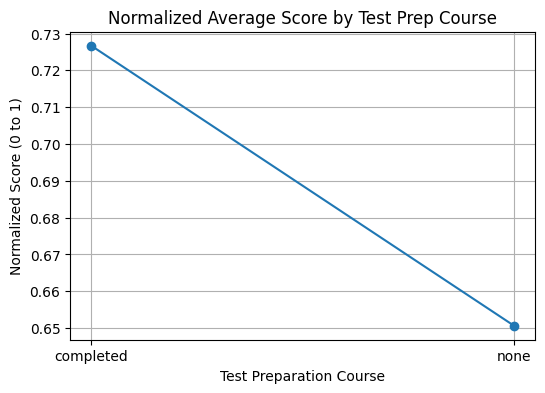

In [160]:
prep_avg = df.groupby('test_preparation_course')['normalized'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(prep_avg['test_preparation_course'], prep_avg['normalized'], marker='o')
plt.title('Normalized Average Score by Test Prep Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Normalized Score (0 to 1)')
plt.grid(True)
plt.show()

### Insights: Analyze the normalized average scores of students based on their test preparation course.

Completed: 0.727

None: 0.651

Students who completed the test preparation course scored higher on average, confirming the benefit of prep courses. This reflects a positive impact on performance, showing that structured preparation is likely effective.

### Bar Chart

Honor Students by Gender

C:\Users\Acer\AppData\Local\Temp\ipykernel_824\1339761969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=honor_students, x='gender', palette='Set2')


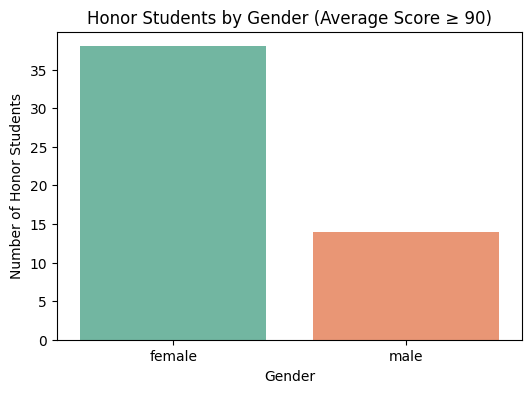

In [161]:
honor_students = df[df['average_score'] >= 90]

plt.figure(figsize=(6,4))
sns.countplot(data=honor_students, x='gender', palette='Set2')
plt.title('Honor Students by Gender (Average Score ≥ 90)')
plt.xlabel('Gender')
plt.ylabel('Number of Honor Students')
plt.show()

### Insights: Identify honor students by gender.

Honor students (with average scores ≥ 90) are more commonly female:

Female: 38

Male: 14

This suggests that a higher proportion of high-achieving students in this dataset are female. This could reflect stronger academic consistency or better performance across all three subjects for female students.

Pass or Fail by Ethnicity

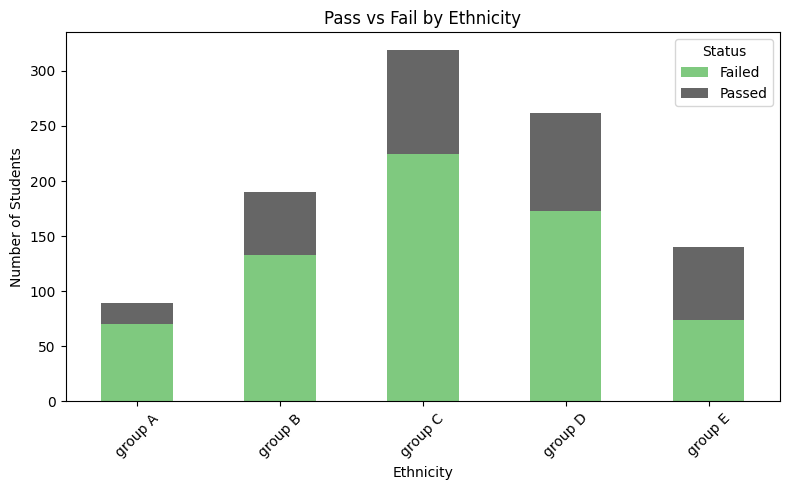

In [143]:
df['status'] = df['average_score'].apply(lambda x: 'Passed' if x >= 75 else 'Failed')

pass_fail = pd.crosstab(df['race_ethnicity'], df['status'])

# Stacked bar graph
pass_fail.plot(kind='bar', stacked=True, colormap='Accent', figsize=(8,5))
plt.title('Pass vs Fail by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

### Insights: Identify students who passed or failed by ethnicity.
Passing is defined as an average score ≥ 75.

Passed students by group:

Group C: 57

Group D: 57

Group E: 48

Group B: 36

Group A: 13

Failed students by group:

Group C: 177

Group D: 129

Group B: 116

Group A: 65

Group E: 54

Group C has the highest number of both passes and fails, suggesting it has the largest population. Group E, while smaller in count, has a relatively higher pass-to-fail ratio compared to Groups A, B, and C. Group A has the lowest performance overall.

### Scatter Plot
Correlation Between Exam Scores

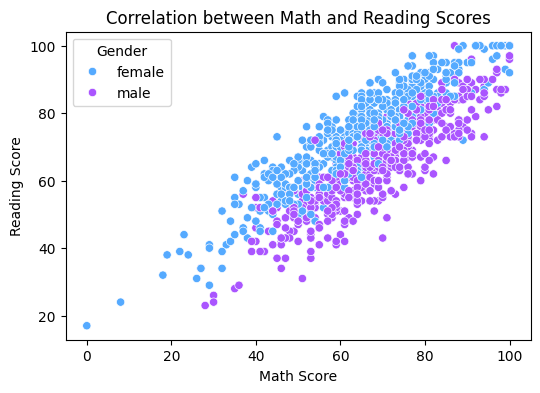

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='gender', palette='cool')
plt.title('Correlation between Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Gender')
plt.show()

### Insights: Display the correlation matrix of the three exam scores.

Math & Reading: 0.815

Math & Writing: 0.800

Reading & Writing: 0.955

All three subjects are highly correlated. The strongest relationship is between reading and writing scores, suggesting that literacy skills are closely tied. Math also shows a strong correlation with both, implying that high performers tend to do well across all subjects, but the link between literacy subjects is strongest.

### Histogram
 Distribution of Exam Scores

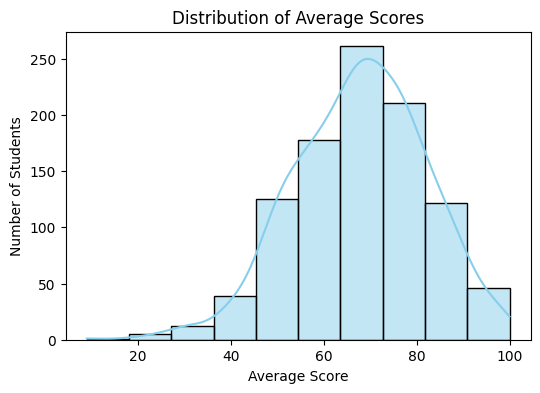

In [148]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='average_score', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()

### Insights: Descriptive statistics of the exam scores.

The average exam scores are as follows:

Math: 66.14

Reading: 69.17

Writing: 68.05

Each subject has a wide score range, with Math having the lowest minimum score (0). The standard deviation is around 15 for each subject, indicating moderately dispersed performance. Most students score between 57–77, suggesting a generally mid-level performance with a few outliers on both end